In [68]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import glob

In [72]:
import seaborn as sns

## 1. 原始数据分段

In [3]:
sample_data = './data/raw/driving/AA00001.csv'

In [45]:
rawdf = pd.read_csv(sample_data)

### 观察数据

In [46]:
rawdf

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0                 AA00001  AAA9102001              120  115.944523  28.651165   
1                 AA00001  AAA9102001              120  115.944523  28.651165   
2                 AA00001  AAA9102001              120  115.944523  28.651165   
3                 AA00001  AAA9102001              120  115.944523  28.651165   
4                 AA00001  AAA9102001              120  115.944523  28.651165   
5                 AA00001  AAA9102001              120  115.944523  28.651165   
6                 AA00001  AAA9102001              120  115.944523  28.651165   
7                 AA00001  AAA9102001              120  115.944523  28.651165   
8                 AA00001  AAA9102001              120  115.944523  28.651165   
9                 AA00001  AAA9102001              120  115.944523  28.651165   
10                AA00001  AAA9102001              120  115.944523  28.651165   
11                AA00001  AAA9102001              120  115.944523  28.651165   
12                AA00001  AAA9102001              120  115.944523  28.651165   
13                AA00001  AAA9102001              120  115.944523  28.651165   
14                AA00001  AAA9102001              120  115.944523  28.651165   
15                AA00001  AAA9102001              120  115.944523  28.651165   
16                AA00001  AAA9102001              120  115.944523  28.651165   
17                AA00001  AAA9102001              120  115.944523  28.651165   
18                AA00001  AAA9102001              120  115.944523  28.651165   
19                AA00001  AAA9102001              120  115.944523  28.651165   
20                AA00001  AAA9102001              120  115.944523  28.651165   
21                AA00001  AAA9102001              120  115.944523  28.651165   
22                AA00001  AAA9102001              120  115.944523  28.651165   
23                AA00001  AAA9102001              120  115.944523  28.651165   
24                AA00001  AAA9102001              120  115.944523  28.651165   
25                AA00001  AAA9102001              120  115.944523  28.651165   
26                AA00001  AAA9102001              120  115.944523  28.651165   
27                AA00001  AAA9102001              120  115.944523  28.651165   
28                AA00001  AAA9102001              120  115.944523  28.651165   
29                AA00001  AAA9102001              120  115.944523  28.651165   
...                   ...         ...              ...         ...        ...   
163464            AA00001  AAA9102001              189  115.822031  28.705926   
163465            AA00001  AAA9102001              189  115.822023  28.705925   
163466            AA00001  AAA9102001              189  115.822016  28.705925   
163467            AA00001  AAA9102001              189  115.822015  28.705923   
163468            AA00001  AAA9102001              189  115.822013  28.705921   
163469            AA00001  AAA9102001              189  115.822011  28.705923   
163470            AA00001  AAA9102001              189  115.822010  28.705923   
163471            AA00001  AAA9102001              189  115.822011  28.705923   
163472            AA00001  AAA9102001              189  115.822011  28.705923   
163473            AA00001  AAA9102001              189  115.822000  28.705926   
163474            AA00001  AAA9102001              189  115.822000  28.705926   
163475            AA00001  AAA9102001              189  115.821998  28.705926   
163476            AA00001  AAA9102001              189  115.821996  28.705928   
163477            AA00001  AAA9102001              189  115.821996  28.705928   
163478            AA00001  AAA9102001              189  115.821996  28.705928   
163479            AA00001  AAA9102001              189  115.822006  28.705925   
163480            AA00001  AAA9102001              189  115.822006  28.705925   
163481            AA00001  AAA9102001 

In [47]:
rawdf.describe()

direction_angle            lng            lat      acc_state  \
count    163494.000000  163494.000000  163494.000000  163494.000000   
mean        168.162764     115.816108      28.333468       0.968647   
std         110.191409       0.767840       0.753407       0.174270   
min           0.000000     114.156420      26.564133       0.000000   
25%          63.000000     115.479943      27.959188       1.000000   
50%         181.000000     115.855331      28.650861       1.000000   
75%         264.000000     116.181520      28.705685       1.000000   
max         359.000000     117.998560      29.998430       1.000000   

       right_turn_signals  left_turn_signals  hand_brake  foot_brake  \
count            163494.0           163494.0    163494.0    163494.0   
mean                  0.0                0.0         0.0         0.0   
std                   0.0                0.0         0.0         0.0   
min                   0.0                0.0         0.0         0.0   
25%                   0.0                0.0         0.0         0.0   
50%                   0.0                0.0         0.0         0.0   
75%                   0.0                0.0         0.0         0.0   
max                   0.0                0.0         0.0         0.0   

           gps_speed        mileage  
count  163494.000000  163494.000000  
mean       43.580107    8329.591832  
std        36.671132    2673.399694  
min         0.000000    4678.000000  
25%         0.000000    5230.000000  
50%        43.000000   10210.000000  
75%        85.000000   10621.000000  
max       102.000000   11191.000000

In [48]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163494 entries, 0 to 163493
Data columns (total 13 columns):
vehicleplatenumber    163494 non-null object
device_num            163494 non-null object
direction_angle       163494 non-null int64
lng                   163494 non-null float64
lat                   163494 non-null float64
acc_state             163494 non-null int64
right_turn_signals    163494 non-null int64
left_turn_signals     163494 non-null int64
hand_brake            163494 non-null int64
foot_brake            163494 non-null int64
location_time         163494 non-null object
gps_speed             163494 non-null int64
mileage               163494 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 16.2+ MB


In [49]:
rawdf[df.gps_speed > 0]

vehicleplatenumber  device_num  direction_angle         lng        lat  \
110               AA00001  AAA9102001              114  115.944571  28.651140   
111               AA00001  AAA9102001              110  115.944603  28.651126   
112               AA00001  AAA9102001              108  115.944643  28.651118   
113               AA00001  AAA9102001              108  115.944691  28.651106   
114               AA00001  AAA9102001              108  115.944753  28.651090   
115               AA00001  AAA9102001              112  115.944816  28.651071   
116               AA00001  AAA9102001              112  115.944878  28.651050   
117               AA00001  AAA9102001              112  115.944941  28.651030   
118               AA00001  AAA9102001              115  115.945001  28.651006   
119               AA00001  AAA9102001              115  115.945070  28.650981   
120               AA00001  AAA9102001              115  115.945141  28.650955   
121               AA00001  AAA9102001              115  115.945213  28.650925   
122               AA00001  AAA9102001              116  115.945290  28.650891   
123               AA00001  AAA9102001              116  115.945370  28.650856   
124               AA00001  AAA9102001              117  115.945453  28.650818   
125               AA00001  AAA9102001              116  115.945538  28.650780   
126               AA00001  AAA9102001              117  115.945623  28.650741   
127               AA00001  AAA9102001              118  115.945705  28.650703   
128               AA00001  AAA9102001              117  115.945783  28.650666   
129               AA00001  AAA9102001              115  115.945941  28.650598   
130               AA00001  AAA9102001              115  115.946026  28.650563   
131               AA00001  AAA9102001              115  115.946115  28.650526   
132               AA00001  AAA9102001              115  115.946205  28.650488   
133               AA00001  AAA9102001              115  115.946300  28.650448   
134               AA00001  AAA9102001              116  115.946396  28.650406   
135               AA00001  AAA9102001              116  115.946495  28.650365   
136               AA00001  AAA9102001              115  115.946596  28.650321   
137               AA00001  AAA9102001              115  115.946701  28.650278   
138               AA00001  AAA9102001              115  115.946806  28.650236   
139               AA00001  AAA9102001              115  115.946913  28.650193   
...                   ...         ...              ...         ...        ...   
163407            AA00001  AAA9102001              122  115.820278  28.706785   
163408            AA00001  AAA9102001              127  115.820368  28.706743   
163409            AA00001  AAA9102001              126  115.820440  28.706701   
163410            AA00001  AAA9102001              125  115.820501  28.706658   
163411            AA00001  AAA9102001              127  115.820570  28.706613   
163412            AA00001  AAA9102001              126  115.820638  28.706573   
163413            AA00001  AAA9102001              127  115.820700  28.706533   
163414            AA00001  AAA9102001              129  115.820761  28.706485   
163415            AA00001  AAA9102001              128  115.820828  28.706438   
163416            AA00001  AAA9102001              128  115.820965  28.706341   
163417            AA00001  AAA9102001              130  115.821033  28.706288   
163418            AA00001  AAA9102001              130  115.821103  28.706231   
163419            AA00001  AAA9102001              132  115.821170  28.706175   
163420            AA00001  AAA9102001              134  115.821235  28.706116   
163421            AA00001  AAA9102001              132  115.821300  28.706063   
163422            AA00001  AAA9102001              132  115.821363  28.706010   
163423            AA00001  AAA9102001              134  115.821420  28.705958   
163424            AA00001  AAA9102001 

In [50]:
len(rawdf)

163494

### 预处理

In [29]:
import time

In [51]:
rawdf['timestamp'] = rawdf['location_time'].apply(lambda x: time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S')))

In [52]:
rawdf

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0                 AA00001  AAA9102001              120  115.944523  28.651165   
1                 AA00001  AAA9102001              120  115.944523  28.651165   
2                 AA00001  AAA9102001              120  115.944523  28.651165   
3                 AA00001  AAA9102001              120  115.944523  28.651165   
4                 AA00001  AAA9102001              120  115.944523  28.651165   
5                 AA00001  AAA9102001              120  115.944523  28.651165   
6                 AA00001  AAA9102001              120  115.944523  28.651165   
7                 AA00001  AAA9102001              120  115.944523  28.651165   
8                 AA00001  AAA9102001              120  115.944523  28.651165   
9                 AA00001  AAA9102001              120  115.944523  28.651165   
10                AA00001  AAA9102001              120  115.944523  28.651165   
11                AA00001  AAA9102001              120  115.944523  28.651165   
12                AA00001  AAA9102001              120  115.944523  28.651165   
13                AA00001  AAA9102001              120  115.944523  28.651165   
14                AA00001  AAA9102001              120  115.944523  28.651165   
15                AA00001  AAA9102001              120  115.944523  28.651165   
16                AA00001  AAA9102001              120  115.944523  28.651165   
17                AA00001  AAA9102001              120  115.944523  28.651165   
18                AA00001  AAA9102001              120  115.944523  28.651165   
19                AA00001  AAA9102001              120  115.944523  28.651165   
20                AA00001  AAA9102001              120  115.944523  28.651165   
21                AA00001  AAA9102001              120  115.944523  28.651165   
22                AA00001  AAA9102001              120  115.944523  28.651165   
23                AA00001  AAA9102001              120  115.944523  28.651165   
24                AA00001  AAA9102001              120  115.944523  28.651165   
25                AA00001  AAA9102001              120  115.944523  28.651165   
26                AA00001  AAA9102001              120  115.944523  28.651165   
27                AA00001  AAA9102001              120  115.944523  28.651165   
28                AA00001  AAA9102001              120  115.944523  28.651165   
29                AA00001  AAA9102001              120  115.944523  28.651165   
...                   ...         ...              ...         ...        ...   
163464            AA00001  AAA9102001              189  115.822031  28.705926   
163465            AA00001  AAA9102001              189  115.822023  28.705925   
163466            AA00001  AAA9102001              189  115.822016  28.705925   
163467            AA00001  AAA9102001              189  115.822015  28.705923   
163468            AA00001  AAA9102001              189  115.822013  28.705921   
163469            AA00001  AAA9102001              189  115.822011  28.705923   
163470            AA00001  AAA9102001              189  115.822010  28.705923   
163471            AA00001  AAA9102001              189  115.822011  28.705923   
163472            AA00001  AAA9102001              189  115.822011  28.705923   
163473            AA00001  AAA9102001              189  115.822000  28.705926   
163474            AA00001  AAA9102001              189  115.822000  28.705926   
163475            AA00001  AAA9102001              189  115.821998  28.705926   
163476            AA00001  AAA9102001              189  115.821996  28.705928   
163477            AA00001  AAA9102001              189  115.821996  28.705928   
163478            AA00001  AAA9102001              189  115.821996  28.705928   
163479            AA00001  AAA9102001              189  115.822006  28.705925   
163480            AA00001  AAA9102001              189  115.822006  28.705925   
163481            AA00001  AAA9102001 

### 统计间隔时间

In [53]:
# 所有数据下移一行，下面用来做差值用
rawdf_shift = rawdf.shift(1)

In [54]:
rawdf_shift

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0                     NaN         NaN              NaN         NaN        NaN   
1                 AA00001  AAA9102001            120.0  115.944523  28.651165   
2                 AA00001  AAA9102001            120.0  115.944523  28.651165   
3                 AA00001  AAA9102001            120.0  115.944523  28.651165   
4                 AA00001  AAA9102001            120.0  115.944523  28.651165   
5                 AA00001  AAA9102001            120.0  115.944523  28.651165   
6                 AA00001  AAA9102001            120.0  115.944523  28.651165   
7                 AA00001  AAA9102001            120.0  115.944523  28.651165   
8                 AA00001  AAA9102001            120.0  115.944523  28.651165   
9                 AA00001  AAA9102001            120.0  115.944523  28.651165   
10                AA00001  AAA9102001            120.0  115.944523  28.651165   
11                AA00001  AAA9102001            120.0  115.944523  28.651165   
12                AA00001  AAA9102001            120.0  115.944523  28.651165   
13                AA00001  AAA9102001            120.0  115.944523  28.651165   
14                AA00001  AAA9102001            120.0  115.944523  28.651165   
15                AA00001  AAA9102001            120.0  115.944523  28.651165   
16                AA00001  AAA9102001            120.0  115.944523  28.651165   
17                AA00001  AAA9102001            120.0  115.944523  28.651165   
18                AA00001  AAA9102001            120.0  115.944523  28.651165   
19                AA00001  AAA9102001            120.0  115.944523  28.651165   
20                AA00001  AAA9102001            120.0  115.944523  28.651165   
21                AA00001  AAA9102001            120.0  115.944523  28.651165   
22                AA00001  AAA9102001            120.0  115.944523  28.651165   
23                AA00001  AAA9102001            120.0  115.944523  28.651165   
24                AA00001  AAA9102001            120.0  115.944523  28.651165   
25                AA00001  AAA9102001            120.0  115.944523  28.651165   
26                AA00001  AAA9102001            120.0  115.944523  28.651165   
27                AA00001  AAA9102001            120.0  115.944523  28.651165   
28                AA00001  AAA9102001            120.0  115.944523  28.651165   
29                AA00001  AAA9102001            120.0  115.944523  28.651165   
...                   ...         ...              ...         ...        ...   
163464            AA00001  AAA9102001            189.0  115.822038  28.705925   
163465            AA00001  AAA9102001            189.0  115.822031  28.705926   
163466            AA00001  AAA9102001            189.0  115.822023  28.705925   
163467            AA00001  AAA9102001            189.0  115.822016  28.705925   
163468            AA00001  AAA9102001            189.0  115.822015  28.705923   
163469            AA00001  AAA9102001            189.0  115.822013  28.705921   
163470            AA00001  AAA9102001            189.0  115.822011  28.705923   
163471            AA00001  AAA9102001            189.0  115.822010  28.705923   
163472            AA00001  AAA9102001            189.0  115.822011  28.705923   
163473            AA00001  AAA9102001            189.0  115.822011  28.705923   
163474            AA00001  AAA9102001            189.0  115.822000  28.705926   
163475            AA00001  AAA9102001            189.0  115.822000  28.705926   
163476            AA00001  AAA9102001            189.0  115.821998  28.705926   
163477            AA00001  AAA9102001            189.0  115.821996  28.705928   
163478            AA00001  AAA9102001            189.0  115.821996  28.705928   
163479            AA00001  AAA9102001            189.0  115.821996  28.705928   
163480            AA00001  AAA9102001            189.0  115.822006  28.705925   
163481            AA00001  AAA9102001 

In [55]:
# 下一秒时间减去上一秒时间，如果差值过大那么则数据需要分段
rawdf_timestamp_minus = rawdf['timestamp'] - rawdf_shift['timestamp']

In [56]:
rawdf_timestamp_minus.describe()

count    1.634930e+05
mean     2.134516e+01
std      6.976751e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.817568e+06
Name: timestamp, dtype: float64

In [116]:
rawdf_timestamp_minus

0         NaN
1         2.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
163464    1.0
163465    1.0
163466    1.0
163467    1.0
163468    1.0
163469    1.0
163470    1.0
163471    1.0
163472    1.0
163473    1.0
163474    1.0
163475    1.0
163476    1.0
163477    1.0
163478    1.0
163479    1.0
163480    1.0
163481    1.0
163482    1.0
163483    1.0
163484    1.0
163485    1.0
163486    1.0
163487    1.0
163488    1.0
163489    1.0
163490    1.0
163491    1.0
163492    1.0
163493    1.0
Name: timestamp, Length: 163494, dtype: float64

In [119]:
# 看看差别 1 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 1])

2668

In [121]:
# 看看差别 2 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 2])

173

In [133]:
# 看看差别 5 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 5])

77

In [131]:
# 看看差别 10 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 10])

76

In [132]:
# 看看差别 30 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 30])

76

In [137]:
# 看看差别 60 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 100])

71

目前来看间隔 2 秒 的以上的点明显减少，10 秒以上基本不再变化，所以 10 秒可做分界点

In [94]:
rawdf_timestamp_minus_max = int(np.max(rawdf_timestamp_minus).item())

In [150]:
# 统计下间隔时间的分布图
timestamps_minus_lengths = [len(rawdf_timestamp_minus[rawdf_timestamp_minus > length]) for length in range(1, 100)]

In [154]:
timestamps_minus_lengths

[2668,
 173,
 93,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 73,
 73,
 73,
 73,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 70,
 69,
 69,
 69,
 69]

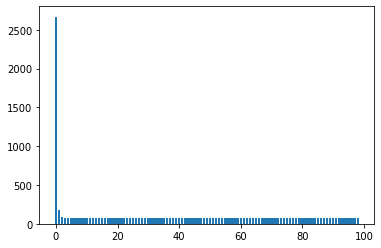

In [157]:
# 间隔时间为 1-100 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths)), timestamps_minus_lengths)
plt.show()

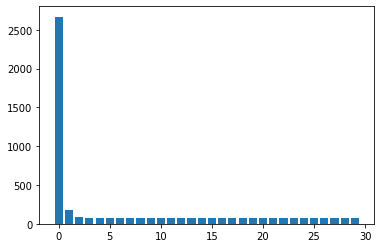

In [158]:
# 间隔时间为 1-30 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths[:30])), timestamps_minus_lengths[:30])
plt.show()

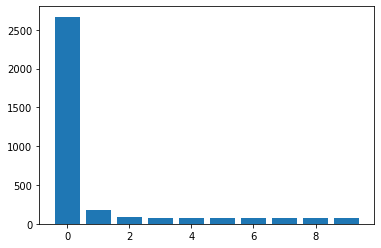

In [159]:
# 间隔时间为 1-10 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths[:10])), timestamps_minus_lengths[:10])
plt.show()

基本上可以看到间隔时间 3 秒的时候，就稳定差不多了，我们就选 10 秒作为时间段间隔吧。

即如果前一条数据和后一条数据间隔超过 10 秒，那就切开

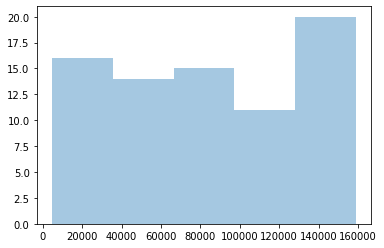

In [160]:
# 看看大约分割点在哪个地方分布较多
sns.distplot(np.where(rawdf_timestamp_minus > 10), kde=False)

看起来在分割点位置比较平均

### 开始分割

将大的 DataFrame 按照时间段划分为小的 DataFrames

In [163]:
rawdf['timestamp_minus'] = rawdf_timestamp_minus

In [164]:
rawdf

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0                 AA00001  AAA9102001              120  115.944523  28.651165   
1                 AA00001  AAA9102001              120  115.944523  28.651165   
2                 AA00001  AAA9102001              120  115.944523  28.651165   
3                 AA00001  AAA9102001              120  115.944523  28.651165   
4                 AA00001  AAA9102001              120  115.944523  28.651165   
5                 AA00001  AAA9102001              120  115.944523  28.651165   
6                 AA00001  AAA9102001              120  115.944523  28.651165   
7                 AA00001  AAA9102001              120  115.944523  28.651165   
8                 AA00001  AAA9102001              120  115.944523  28.651165   
9                 AA00001  AAA9102001              120  115.944523  28.651165   
10                AA00001  AAA9102001              120  115.944523  28.651165   
11                AA00001  AAA9102001              120  115.944523  28.651165   
12                AA00001  AAA9102001              120  115.944523  28.651165   
13                AA00001  AAA9102001              120  115.944523  28.651165   
14                AA00001  AAA9102001              120  115.944523  28.651165   
15                AA00001  AAA9102001              120  115.944523  28.651165   
16                AA00001  AAA9102001              120  115.944523  28.651165   
17                AA00001  AAA9102001              120  115.944523  28.651165   
18                AA00001  AAA9102001              120  115.944523  28.651165   
19                AA00001  AAA9102001              120  115.944523  28.651165   
20                AA00001  AAA9102001              120  115.944523  28.651165   
21                AA00001  AAA9102001              120  115.944523  28.651165   
22                AA00001  AAA9102001              120  115.944523  28.651165   
23                AA00001  AAA9102001              120  115.944523  28.651165   
24                AA00001  AAA9102001              120  115.944523  28.651165   
25                AA00001  AAA9102001              120  115.944523  28.651165   
26                AA00001  AAA9102001              120  115.944523  28.651165   
27                AA00001  AAA9102001              120  115.944523  28.651165   
28                AA00001  AAA9102001              120  115.944523  28.651165   
29                AA00001  AAA9102001              120  115.944523  28.651165   
...                   ...         ...              ...         ...        ...   
163464            AA00001  AAA9102001              189  115.822031  28.705926   
163465            AA00001  AAA9102001              189  115.822023  28.705925   
163466            AA00001  AAA9102001              189  115.822016  28.705925   
163467            AA00001  AAA9102001              189  115.822015  28.705923   
163468            AA00001  AAA9102001              189  115.822013  28.705921   
163469            AA00001  AAA9102001              189  115.822011  28.705923   
163470            AA00001  AAA9102001              189  115.822010  28.705923   
163471            AA00001  AAA9102001              189  115.822011  28.705923   
163472            AA00001  AAA9102001              189  115.822011  28.705923   
163473            AA00001  AAA9102001              189  115.822000  28.705926   
163474            AA00001  AAA9102001              189  115.822000  28.705926   
163475            AA00001  AAA9102001              189  115.821998  28.705926   
163476            AA00001  AAA9102001              189  115.821996  28.705928   
163477            AA00001  AAA9102001              189  115.821996  28.705928   
163478            AA00001  AAA9102001              189  115.821996  28.705928   
163479            AA00001  AAA9102001              189  115.822006  28.705925   
163480            AA00001  AAA9102001              189  115.822006  28.705925   
163481            AA00001  AAA9102001 

In [166]:
rawdf[0: 1]

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0            AA00001  AAA9102001              120  115.944523  28.651165   

   acc_state  right_turn_signals  left_turn_signals  hand_brake  foot_brake  \
0          1                   0                  0           0           0   

         location_time  gps_speed  mileage     timestamp  timestamp_minus  
0  2018-08-04 01:22:02          0     4678  1.533317e+09              NaN

In [173]:
from copy import deepcopy

In [174]:
count = 10
start, end = 0, 0
rawdf_subs = []
for index, row in rawdf.iterrows():
    # 如果间隔时间超过阈值，那么就切开
    if row.timestamp_minus > 10:
        end = index
        # 切开
        rawdf_sub = rawdf[start: end]
        start = end
        # 汇总到列表
        rawdf_subs.append(deepcopy(rawdf_sub))     

看看切开的结果，第一段、第二段数据，验证下没问题。从第二段数据开始，第一条数据的 timestamp_minus 应该大于 10

In [180]:
rawdf_subs[0]

vehicleplatenumber  device_num  direction_angle         lng        lat  \
0               AA00001  AAA9102001              120  115.944523  28.651165   
1               AA00001  AAA9102001              120  115.944523  28.651165   
2               AA00001  AAA9102001              120  115.944523  28.651165   
3               AA00001  AAA9102001              120  115.944523  28.651165   
4               AA00001  AAA9102001              120  115.944523  28.651165   
5               AA00001  AAA9102001              120  115.944523  28.651165   
6               AA00001  AAA9102001              120  115.944523  28.651165   
7               AA00001  AAA9102001              120  115.944523  28.651165   
8               AA00001  AAA9102001              120  115.944523  28.651165   
9               AA00001  AAA9102001              120  115.944523  28.651165   
10              AA00001  AAA9102001              120  115.944523  28.651165   
11              AA00001  AAA9102001              120  115.944523  28.651165   
12              AA00001  AAA9102001              120  115.944523  28.651165   
13              AA00001  AAA9102001              120  115.944523  28.651165   
14              AA00001  AAA9102001              120  115.944523  28.651165   
15              AA00001  AAA9102001              120  115.944523  28.651165   
16              AA00001  AAA9102001              120  115.944523  28.651165   
17              AA00001  AAA9102001              120  115.944523  28.651165   
18              AA00001  AAA9102001              120  115.944523  28.651165   
19              AA00001  AAA9102001              120  115.944523  28.651165   
20              AA00001  AAA9102001              120  115.944523  28.651165   
21              AA00001  AAA9102001              120  115.944523  28.651165   
22              AA00001  AAA9102001              120  115.944523  28.651165   
23              AA00001  AAA9102001              120  115.944523  28.651165   
24              AA00001  AAA9102001              120  115.944523  28.651165   
25              AA00001  AAA9102001              120  115.944523  28.651165   
26              AA00001  AAA9102001              120  115.944523  28.651165   
27              AA00001  AAA9102001              120  115.944523  28.651165   
28              AA00001  AAA9102001              120  115.944523  28.651165   
29              AA00001  AAA9102001              120  115.944523  28.651165   
...                 ...         ...              ...         ...        ...   
4605            AA00001  AAA9102001               90  116.712471  28.787298   
4606            AA00001  AAA9102001               92  116.712745  28.787288   
4607            AA00001  AAA9102001               92  116.713015  28.787276   
4608            AA00001  AAA9102001               92  116.713283  28.787263   
4609            AA00001  AAA9102001               92  116.713550  28.787251   
4610            AA00001  AAA9102001               93  116.713818  28.787235   
4611            AA00001  AAA9102001               94  116.714085  28.787216   
4612            AA00001  AAA9102001               94  116.714351  28.787195   
4613            AA00001  AAA9102001               95  116.714618  28.787171   
4614            AA00001  AAA9102001               95  116.714886  28.787148   
4615            AA00001  AAA9102001               96  116.715156  28.787123   
4616            AA00001  AAA9102001               96  116.715425  28.787096   
4617            AA00001  AAA9102001               97  116.715693  28.787070   
4618            AA00001  AAA9102001               97  116.715960  28.787040   
4619            AA00001  AAA9102001               98  116.716225  28.787008   
4620            AA00001  AAA9102001               98  116.716490  28.786976   
4621            AA00001  AAA9102001               99  116.716755  28.786940   
4622            AA00001  AAA9102001              100  116.717018  28.786901   
4623            AA00001  AAA9102001              100  1

In [177]:
rawdf_subs[1]

vehicleplatenumber  device_num  direction_angle         lng        lat  \
4635            AA00001  AAA9102001              341  116.879581  28.793825   
4636            AA00001  AAA9102001              341  116.879581  28.793825   
4637            AA00001  AAA9102001              341  116.879581  28.793825   
4638            AA00001  AAA9102001              341  116.879581  28.793825   
4639            AA00001  AAA9102001              341  116.879581  28.793825   
4640            AA00001  AAA9102001              341  116.879581  28.793825   
4641            AA00001  AAA9102001              341  116.879581  28.793825   
4642            AA00001  AAA9102001              341  116.879581  28.793825   
4643            AA00001  AAA9102001              341  116.879581  28.793825   
4644            AA00001  AAA9102001              341  116.879581  28.793825   
4645            AA00001  AAA9102001              341  116.879581  28.793825   
4646            AA00001  AAA9102001              341  116.879581  28.793825   
4647            AA00001  AAA9102001              341  116.879581  28.793825   
4648            AA00001  AAA9102001              341  116.879581  28.793825   
4649            AA00001  AAA9102001              341  116.879581  28.793825   
4650            AA00001  AAA9102001              341  116.879581  28.793825   
4651            AA00001  AAA9102001              341  116.879581  28.793825   
4652            AA00001  AAA9102001              341  116.879581  28.793825   
4653            AA00001  AAA9102001              341  116.879581  28.793825   
4654            AA00001  AAA9102001              341  116.879581  28.793825   
4655            AA00001  AAA9102001              341  116.879581  28.793825   
4656            AA00001  AAA9102001              341  116.879581  28.793825   
4657            AA00001  AAA9102001              341  116.879581  28.793825   
4658            AA00001  AAA9102001              341  116.879581  28.793825   
4659            AA00001  AAA9102001              341  116.879581  28.793825   
4660            AA00001  AAA9102001              341  116.879581  28.793825   
4661            AA00001  AAA9102001              341  116.879581  28.793825   
4662            AA00001  AAA9102001              341  116.879581  28.793825   
4663            AA00001  AAA9102001              341  116.879581  28.793825   
4664            AA00001  AAA9102001              341  116.879581  28.793825   
...                 ...         ...              ...         ...        ...   
9185            AA00001  AAA9102001               13  117.311765  29.328135   
9186            AA00001  AAA9102001               13  117.311765  29.328135   
9187            AA00001  AAA9102001               13  117.311765  29.328135   
9188            AA00001  AAA9102001               13  117.311765  29.328135   
9189            AA00001  AAA9102001               13  117.311765  29.328135   
9190            AA00001  AAA9102001               13  117.311765  29.328135   
9191            AA00001  AAA9102001               13  117.311765  29.328135   
9192            AA00001  AAA9102001               13  117.311765  29.328135   
9193            AA00001  AAA9102001               13  117.311765  29.328135   
9194            AA00001  AAA9102001               13  117.311765  29.328135   
9195            AA00001  AAA9102001               13  117.311765  29.328135   
9196            AA00001  AAA9102001               13  117.311745  29.328148   
9197            AA00001  AAA9102001               13  117.311745  29.328148   
9198            AA00001  AAA9102001               13  117.311745  29.328148   
9199            AA00001  AAA9102001               13  117.311745  29.328148   
9200            AA00001  AAA9102001               13  117.311745  29.328148   
9201            AA00001  AAA9102001               13  117.311745  29.328148   
9202            AA00001  AAA9102001               13  117.311745  29.328148   
9203            AA00001  AAA9102001               13  1

将以上切开的数据持久化保存一下，以后备作他用。

In [183]:
output_folder = './data/segments/driving'

In [187]:
from os.path import basename, dirname, join, exists
from os import makedirs
from pathlib import Path

In [188]:
exists(output_folder) or makedirs(output_folder)

In [185]:
# 文件名
stem = Path(sample_data).stem
stem

'AA00001'

In [190]:
for index, rawdf_sub in enumerate(rawdf_subs):
    output_path = join(output_folder, f'{stem}_{index}.csv')
    rawdf_sub.to_csv(output_path)
    print(f'saved to {output_path}')

saved to ./data/segments/driving/AA00001_0.csv
saved to ./data/segments/driving/AA00001_1.csv
saved to ./data/segments/driving/AA00001_2.csv
saved to ./data/segments/driving/AA00001_3.csv
saved to ./data/segments/driving/AA00001_4.csv
saved to ./data/segments/driving/AA00001_5.csv
saved to ./data/segments/driving/AA00001_6.csv
saved to ./data/segments/driving/AA00001_7.csv
saved to ./data/segments/driving/AA00001_8.csv
saved to ./data/segments/driving/AA00001_9.csv
saved to ./data/segments/driving/AA00001_10.csv
saved to ./data/segments/driving/AA00001_11.csv
saved to ./data/segments/driving/AA00001_12.csv
saved to ./data/segments/driving/AA00001_13.csv
saved to ./data/segments/driving/AA00001_14.csv
saved to ./data/segments/driving/AA00001_15.csv
saved to ./data/segments/driving/AA00001_16.csv
saved to ./data/segments/driving/AA00001_17.csv
saved to ./data/segments/driving/AA00001_18.csv
saved to ./data/segments/driving/AA00001_19.csv
saved to ./data/segments/driving/AA00001_20.csv
sa

## 2. 速度加速度预处理

### 速度处理

先拿其中一个分段的数据来处理

In [195]:
len(rawdf_subs[10])

2223

In [196]:
rawdf_subs[10]

vehicleplatenumber  device_num  direction_angle         lng        lat  \
28110            AA00001  AAA9102001              189  115.860948  28.816311   
28111            AA00001  AAA9102001              191  115.860946  28.816265   
28112            AA00001  AAA9102001              192  115.860945  28.816288   
28113            AA00001  AAA9102001              199  115.860926  28.816196   
28114            AA00001  AAA9102001              203  115.860911  28.816158   
28115            AA00001  AAA9102001              203  115.860900  28.816123   
28116            AA00001  AAA9102001              204  115.860881  28.816083   
28117            AA00001  AAA9102001              203  115.860860  28.816036   
28118            AA00001  AAA9102001              202  115.860835  28.815981   
28119            AA00001  AAA9102001              203  115.860803  28.815920   
28120            AA00001  AAA9102001              203  115.860770  28.815848   
28121            AA00001  AAA9102001              202  115.860733  28.815773   
28122            AA00001  AAA9102001              200  115.860700  28.815700   
28123            AA00001  AAA9102001              200  115.860665  28.815621   
28124            AA00001  AAA9102001              200  115.860625  28.815543   
28125            AA00001  AAA9102001              201  115.860588  28.815461   
28126            AA00001  AAA9102001              200  115.860551  28.815381   
28127            AA00001  AAA9102001              197  115.860520  28.815300   
28128            AA00001  AAA9102001              194  115.860493  28.815216   
28129            AA00001  AAA9102001              196  115.860466  28.815131   
28130            AA00001  AAA9102001              199  115.860436  28.815050   
28131            AA00001  AAA9102001              201  115.860401  28.814966   
28132            AA00001  AAA9102001              202  115.860360  28.814878   
28133            AA00001  AAA9102001              202  115.860320  28.814791   
28134            AA00001  AAA9102001              202  115.860275  28.814701   
28135            AA00001  AAA9102001              201  115.860233  28.814608   
28136            AA00001  AAA9102001              201  115.860193  28.814513   
28137            AA00001  AAA9102001              201  115.860151  28.814416   
28138            AA00001  AAA9102001              204  115.860105  28.814325   
28139            AA00001  AAA9102001              204  115.860056  28.814233   
...                  ...         ...              ...         ...        ...   
30303            AA00001  AAA9102001               53  115.822090  28.705791   
30304            AA00001  AAA9102001               53  115.822090  28.705791   
30305            AA00001  AAA9102001               53  115.822090  28.705791   
30306            AA00001  AAA9102001               53  115.822090  28.705791   
30307            AA00001  AAA9102001               53  115.822090  28.705791   
30308            AA00001  AAA9102001               53  115.822090  28.705791   
30309            AA00001  AAA9102001               53  115.822090  28.705791   
30310            AA00001  AAA9102001               53  115.822090  28.705791   
30311            AA00001  AAA9102001               53  115.822090  28.705791   
30312            AA00001  AAA9102001               53  115.822090  28.705791   
30313            AA00001  AAA9102001               53  115.822090  28.705791   
30314            AA00001  AAA9102001               53  115.822090  28.705791   
30315            AA00001  AAA9102001               53  115.822090  28.705791   
30316            AA00001  AAA9102001               53  115.822090  28.705791   
30317            AA00001  AAA9102001               53  115.822090  28.705791   
30318            AA00001  AAA9102001               53  115.822090  28.705791   
30319            AA00001  AAA9102001               53  115.822090  28.705791   
30320            AA00001  AAA9102001               53  115.822090  28.705791   
30321 

这段还可以，有完整的加速和减速过程，先分析下速度的情况。

In [204]:
segdf = rawdf_subs[10]

In [205]:
speed = segdf.gps_speed

In [206]:
speed

28110     0
28111     0
28112     0
28113    14
28114    15
28115    14
28116    17
28117    20
28118    23
28119    26
28120    30
28121    31
28122    31
28123    32
28124    34
28125    34
28126    35
28127    34
28128    35
28129    35
28130    34
28131    37
28132    39
28133    40
28134    40
28135    41
28136    42
28137    42
28138    40
28139    40
         ..
30303     0
30304     0
30305     0
30306     0
30307     0
30308     0
30309     0
30310     0
30311     0
30312     0
30313     0
30314     0
30315     0
30316     0
30317     0
30318     0
30319     0
30320     0
30321     0
30322     0
30323     0
30324     0
30325     0
30326     0
30327     0
30328     0
30329     0
30330     0
30331     0
30332     0
Name: gps_speed, Length: 2223, dtype: int64

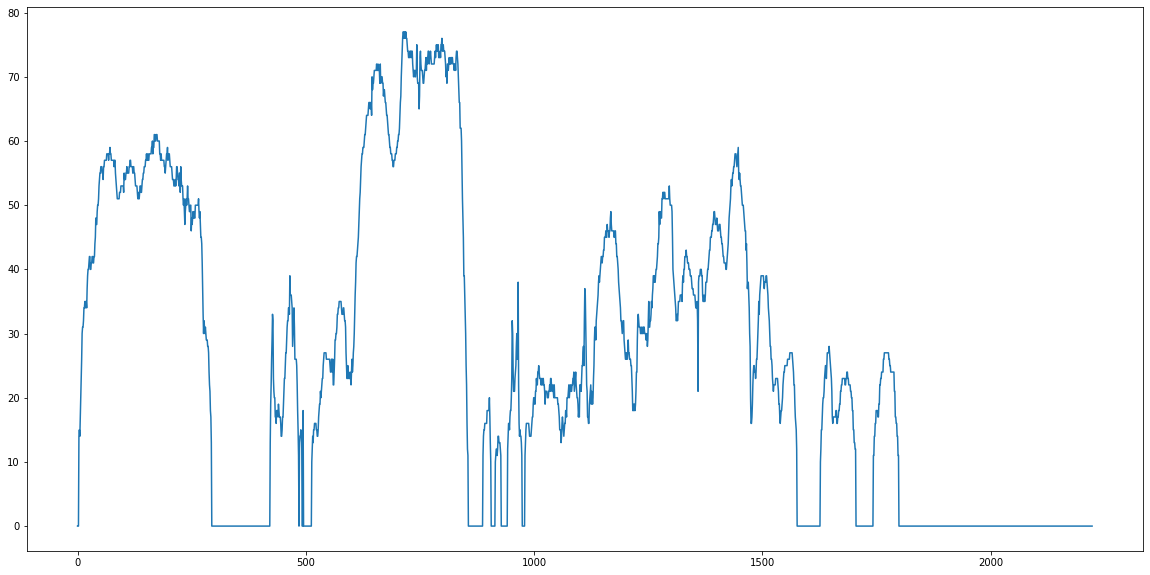

In [300]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(speed)), speed)
plt.show()

可以看到开了好多段，有加速有减速

### 速度平滑（已废弃）

但原始数据有点过于极端，比如速度数据会突然变成 0。我们用窗口来平滑一下，这里使用汉宁窗口，hanning，即利用窗口卷积平滑。

In [305]:
# 窗口大小为 10，即窗口内进行卷积操作
hanning_window_size = 10

In [306]:
hanning_weights = np.hanning(hanning_window_size)
speed_smooth = np.convolve(hanning_weights / hanning_weights.sum(), speed)[hanning_window_size - 1: -hanning_window_size + 1]

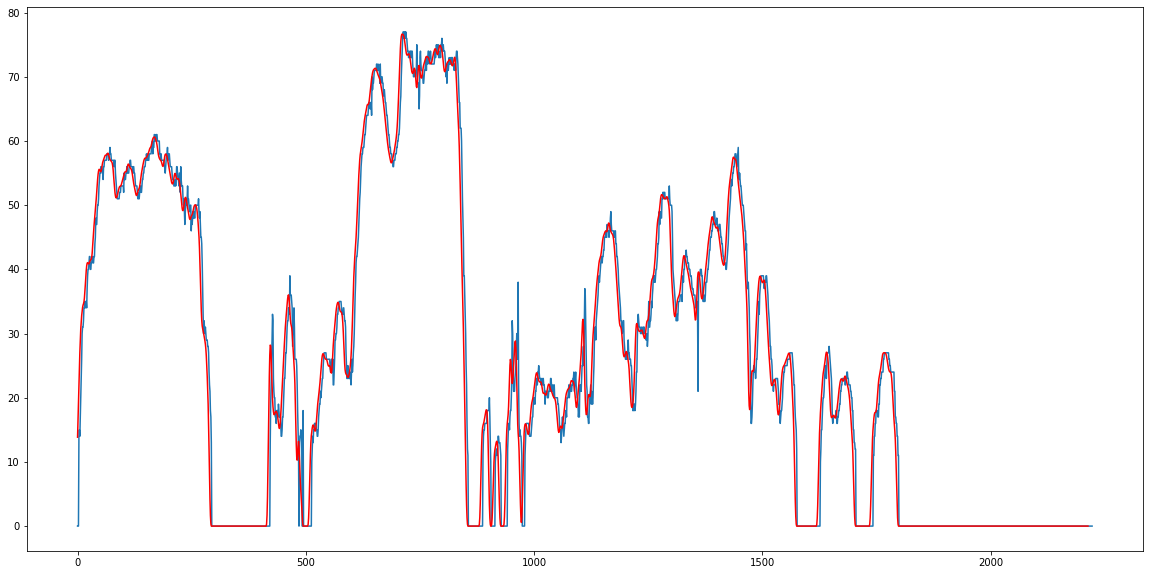

In [307]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(speed)), speed)
plt.plot(range(len(speed_smooth)), speed_smooth, color='red')
plt.show()

目前来看作用不大，那就用原数据吧。

### 加速度处理

下面来分析下加速度情况

In [309]:
# 下移一行，方便前后速度作差
segdf_shift = segdf.shift(1)

In [310]:
segdf_speed_minus = segdf['gps_speed'] - segdf_shift['gps_speed'] 

In [312]:
segdf_speed_minus.describe()

count    2222.000000
mean        0.000000
std         1.828535
min       -18.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: gps_speed, dtype: float64

In [314]:
# 加速度 = 速度除以时间
segdf['acc'] = segdf_speed_minus / segdf['timestamp_minus']

In [319]:
segdf['acc'] = segdf['acc'].fillna(0)

In [320]:
segdf

vehicleplatenumber  device_num  direction_angle         lng        lat  \
28110            AA00001  AAA9102001              189  115.860948  28.816311   
28111            AA00001  AAA9102001              191  115.860946  28.816265   
28112            AA00001  AAA9102001              192  115.860945  28.816288   
28113            AA00001  AAA9102001              199  115.860926  28.816196   
28114            AA00001  AAA9102001              203  115.860911  28.816158   
28115            AA00001  AAA9102001              203  115.860900  28.816123   
28116            AA00001  AAA9102001              204  115.860881  28.816083   
28117            AA00001  AAA9102001              203  115.860860  28.816036   
28118            AA00001  AAA9102001              202  115.860835  28.815981   
28119            AA00001  AAA9102001              203  115.860803  28.815920   
28120            AA00001  AAA9102001              203  115.860770  28.815848   
28121            AA00001  AAA9102001              202  115.860733  28.815773   
28122            AA00001  AAA9102001              200  115.860700  28.815700   
28123            AA00001  AAA9102001              200  115.860665  28.815621   
28124            AA00001  AAA9102001              200  115.860625  28.815543   
28125            AA00001  AAA9102001              201  115.860588  28.815461   
28126            AA00001  AAA9102001              200  115.860551  28.815381   
28127            AA00001  AAA9102001              197  115.860520  28.815300   
28128            AA00001  AAA9102001              194  115.860493  28.815216   
28129            AA00001  AAA9102001              196  115.860466  28.815131   
28130            AA00001  AAA9102001              199  115.860436  28.815050   
28131            AA00001  AAA9102001              201  115.860401  28.814966   
28132            AA00001  AAA9102001              202  115.860360  28.814878   
28133            AA00001  AAA9102001              202  115.860320  28.814791   
28134            AA00001  AAA9102001              202  115.860275  28.814701   
28135            AA00001  AAA9102001              201  115.860233  28.814608   
28136            AA00001  AAA9102001              201  115.860193  28.814513   
28137            AA00001  AAA9102001              201  115.860151  28.814416   
28138            AA00001  AAA9102001              204  115.860105  28.814325   
28139            AA00001  AAA9102001              204  115.860056  28.814233   
...                  ...         ...              ...         ...        ...   
30303            AA00001  AAA9102001               53  115.822090  28.705791   
30304            AA00001  AAA9102001               53  115.822090  28.705791   
30305            AA00001  AAA9102001               53  115.822090  28.705791   
30306            AA00001  AAA9102001               53  115.822090  28.705791   
30307            AA00001  AAA9102001               53  115.822090  28.705791   
30308            AA00001  AAA9102001               53  115.822090  28.705791   
30309            AA00001  AAA9102001               53  115.822090  28.705791   
30310            AA00001  AAA9102001               53  115.822090  28.705791   
30311            AA00001  AAA9102001               53  115.822090  28.705791   
30312            AA00001  AAA9102001               53  115.822090  28.705791   
30313            AA00001  AAA9102001               53  115.822090  28.705791   
30314            AA00001  AAA9102001               53  115.822090  28.705791   
30315            AA00001  AAA9102001               53  115.822090  28.705791   
30316            AA00001  AAA9102001               53  115.822090  28.705791   
30317            AA00001  AAA9102001               53  115.822090  28.705791   
30318            AA00001  AAA9102001               53  115.822090  28.705791   
30319            AA00001  AAA9102001               53  115.822090  28.705791   
30320            AA00001  AAA9102001               53  115.822090  28.705791   
30321 

In [321]:
acc = segdf.acc

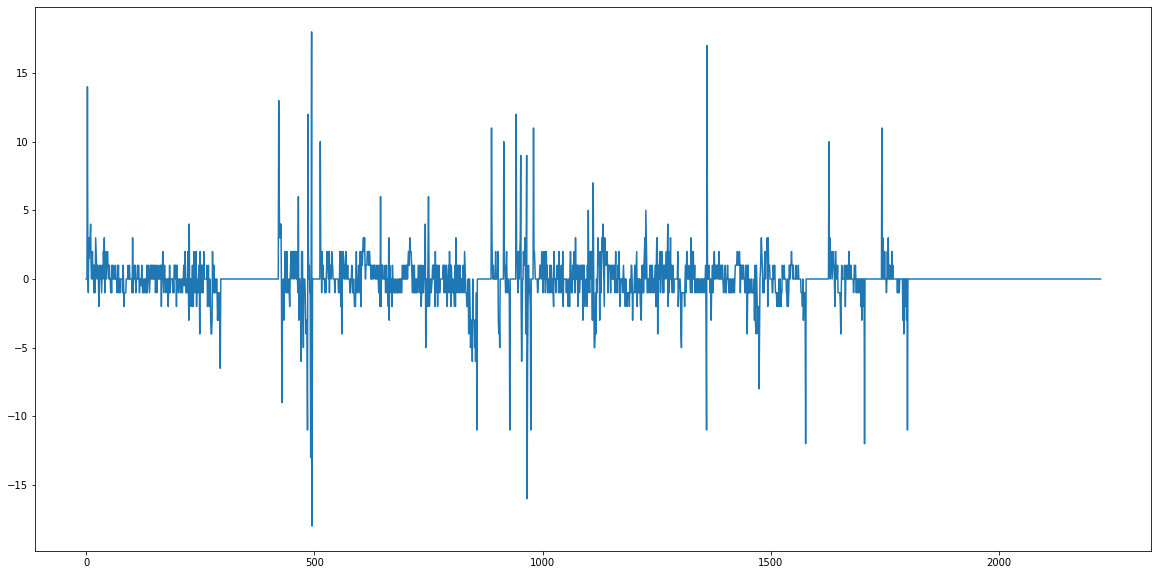

In [327]:
# 绘制加速度数据
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc)), acc)
plt.show()

### 加速度数据平滑（已废弃）

其实照理来说加速度还蛮准的，不是脏数据。但原始数据有点过于极端。我们用窗口来平滑一下，这里还是使用汉宁窗口。

In [328]:
# 窗口大小为 5，即窗口内进行卷积操作
hanning_window_size = 5

In [330]:
hanning_weights = np.hanning(hanning_window_size)
acc_smooth = np.convolve(hanning_weights / hanning_weights.sum(), acc)[hanning_window_size - 1: -hanning_window_size + 1]

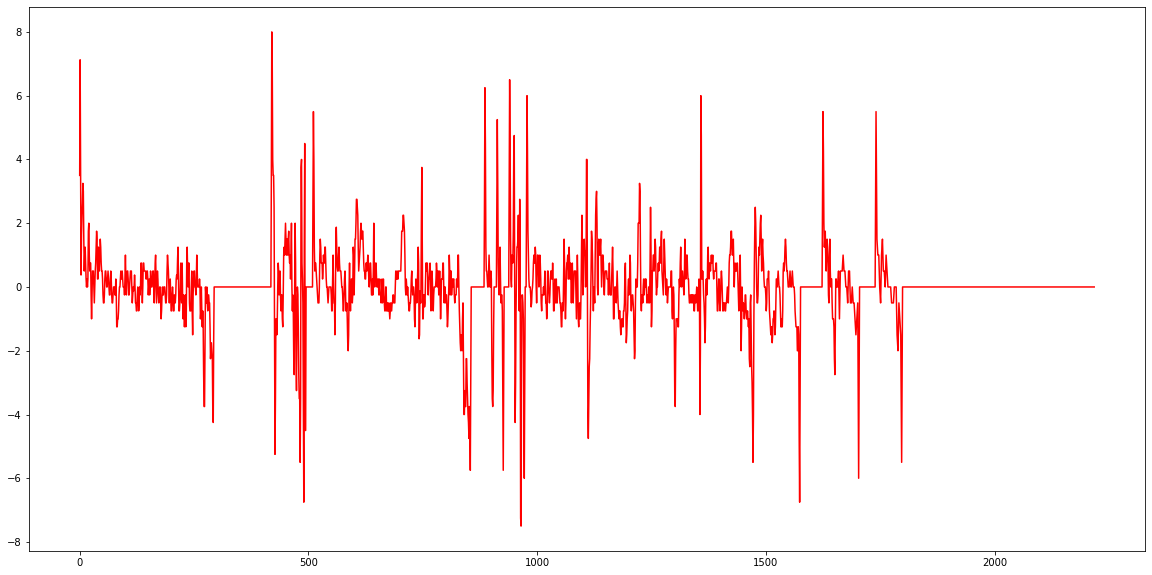

In [331]:
# 绘制平滑后的效果
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc_smooth)), acc_smooth, color='red')
plt.show()

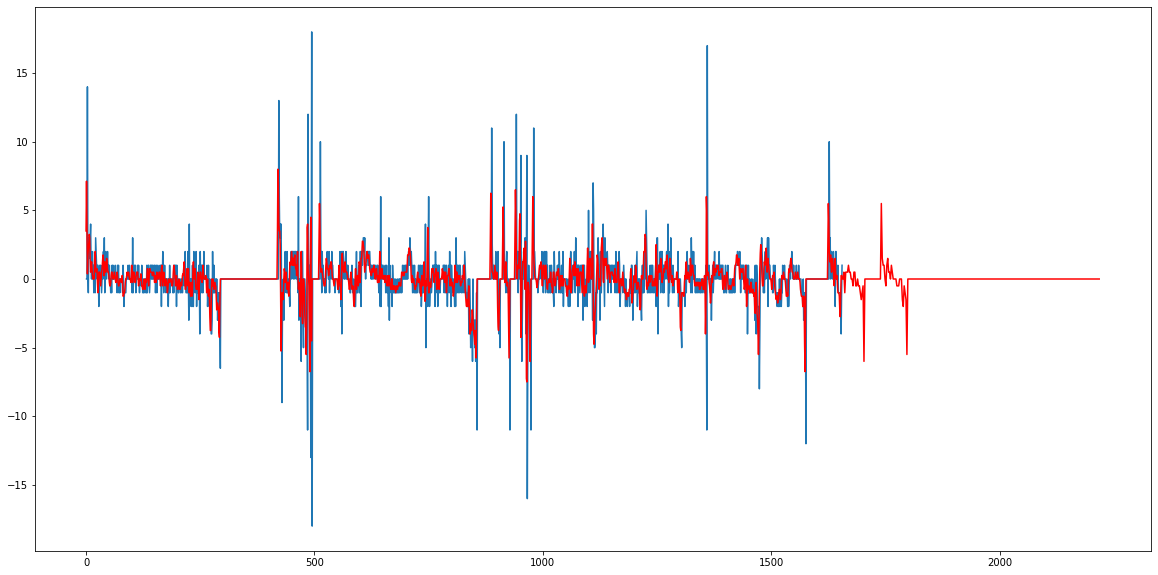

In [333]:
# 平滑前和平滑后的对比
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc)), acc_speed, label='raw')
plt.plot(range(len(acc_smooth)), acc_smooth, label='smooth', color='red')
plt.show()

窗口卷积平滑了之后，可以看到非常极端的数据就去除了。

所以我们后面就用平滑加速度吧，将平滑后的加速度赋值为加速度

### 统计下

In [340]:
segdf

vehicleplatenumber  device_num  direction_angle         lng        lat  \
28110            AA00001  AAA9102001              189  115.860948  28.816311   
28111            AA00001  AAA9102001              191  115.860946  28.816265   
28112            AA00001  AAA9102001              192  115.860945  28.816288   
28113            AA00001  AAA9102001              199  115.860926  28.816196   
28114            AA00001  AAA9102001              203  115.860911  28.816158   
28115            AA00001  AAA9102001              203  115.860900  28.816123   
28116            AA00001  AAA9102001              204  115.860881  28.816083   
28117            AA00001  AAA9102001              203  115.860860  28.816036   
28118            AA00001  AAA9102001              202  115.860835  28.815981   
28119            AA00001  AAA9102001              203  115.860803  28.815920   
28120            AA00001  AAA9102001              203  115.860770  28.815848   
28121            AA00001  AAA9102001              202  115.860733  28.815773   
28122            AA00001  AAA9102001              200  115.860700  28.815700   
28123            AA00001  AAA9102001              200  115.860665  28.815621   
28124            AA00001  AAA9102001              200  115.860625  28.815543   
28125            AA00001  AAA9102001              201  115.860588  28.815461   
28126            AA00001  AAA9102001              200  115.860551  28.815381   
28127            AA00001  AAA9102001              197  115.860520  28.815300   
28128            AA00001  AAA9102001              194  115.860493  28.815216   
28129            AA00001  AAA9102001              196  115.860466  28.815131   
28130            AA00001  AAA9102001              199  115.860436  28.815050   
28131            AA00001  AAA9102001              201  115.860401  28.814966   
28132            AA00001  AAA9102001              202  115.860360  28.814878   
28133            AA00001  AAA9102001              202  115.860320  28.814791   
28134            AA00001  AAA9102001              202  115.860275  28.814701   
28135            AA00001  AAA9102001              201  115.860233  28.814608   
28136            AA00001  AAA9102001              201  115.860193  28.814513   
28137            AA00001  AAA9102001              201  115.860151  28.814416   
28138            AA00001  AAA9102001              204  115.860105  28.814325   
28139            AA00001  AAA9102001              204  115.860056  28.814233   
...                  ...         ...              ...         ...        ...   
30303            AA00001  AAA9102001               53  115.822090  28.705791   
30304            AA00001  AAA9102001               53  115.822090  28.705791   
30305            AA00001  AAA9102001               53  115.822090  28.705791   
30306            AA00001  AAA9102001               53  115.822090  28.705791   
30307            AA00001  AAA9102001               53  115.822090  28.705791   
30308            AA00001  AAA9102001               53  115.822090  28.705791   
30309            AA00001  AAA9102001               53  115.822090  28.705791   
30310            AA00001  AAA9102001               53  115.822090  28.705791   
30311            AA00001  AAA9102001               53  115.822090  28.705791   
30312            AA00001  AAA9102001               53  115.822090  28.705791   
30313            AA00001  AAA9102001               53  115.822090  28.705791   
30314            AA00001  AAA9102001               53  115.822090  28.705791   
30315            AA00001  AAA9102001               53  115.822090  28.705791   
30316            AA00001  AAA9102001               53  115.822090  28.705791   
30317            AA00001  AAA9102001               53  115.822090  28.705791   
30318            AA00001  AAA9102001               53  115.822090  28.705791   
30319            AA00001  AAA9102001               53  115.822090  28.705791   
30320            AA00001  AAA9102001               53  115.822090  28.705791   
30321 

## 3. 聚类处理

### 示例

首先我们随机创建一些二维数据作为训练集，选择二维特征数据，主要是方便可视化。代码如下：

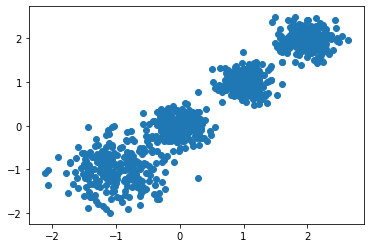

In [344]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# X为样本特征，Y为样本簇类别，共1000个样本，每个样本2个特征，对应x和y轴，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
                  
plt.scatter(X[:, 0], X[:, 1], marker='o')  # 假设暂不知道y类别，不设置c=y，使用kmeans聚类
plt.show()

现在我们来用K-Means聚类方法来做聚类，首先选择k=2，代码如下：

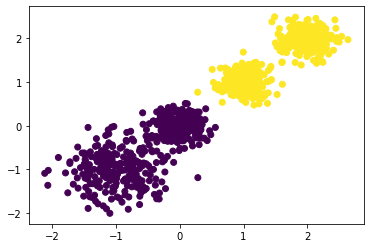

In [345]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

现在我们来看看我们用Calinski-Harabasz Index评估的聚类分数，分数越高聚的越好

In [348]:
from sklearn import metrics
print(metrics.calinski_harabaz_score(X, y_pred))

3116.1706763322227


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


### 准备数据

下面让我们把现有的速度和加速度数据变成 X

In [404]:
segdf['speed'] = segdf['gps_speed']

In [405]:
X = segdf[['gps_speed', 'acc']]

In [406]:
X

gps_speed   acc
28110          0   0.0
28111          0   0.0
28112          0   0.0
28113         14  14.0
28114         15   0.5
28115         14  -1.0
28116         17   3.0
28117         20   1.5
28118         23   3.0
28119         26   3.0
28120         30   4.0
28121         31   1.0
28122         31   0.0
28123         32   1.0
28124         34   2.0
28125         34   0.0
28126         35   1.0
28127         34  -1.0
28128         35   1.0
28129         35   0.0
28130         34  -1.0
28131         37   3.0
28132         39   2.0
28133         40   1.0
28134         40   0.0
28135         41   1.0
28136         42   1.0
28137         42   0.0
28138         40  -2.0
28139         40   0.0
...          ...   ...
30303          0   0.0
30304          0   0.0
30305          0   0.0
30306          0   0.0
30307          0   0.0
30308          0   0.0
30309          0   0.0
30310          0   0.0
30311          0   0.0
30312          0   0.0
30313          0   0.0
30314          0   0.0
30315          0   0.0
30316          0   0.0
30317          0   0.0
30318          0   0.0
30319          0   0.0
30320          0   0.0
30321          0   0.0
30322          0   0.0
30323          0   0.0
30324          0   0.0
30325          0   0.0
30326          0   0.0
30327          0   0.0
30328          0   0.0
30329          0   0.0
30330          0   0.0
30331          0   0.0
30332          0   0.0

[2223 rows x 2 columns]

归一化一下

In [407]:
from sklearn.preprocessing import MinMaxScaler

In [408]:
X = MinMaxScaler().fit_transform(X)

看看效果

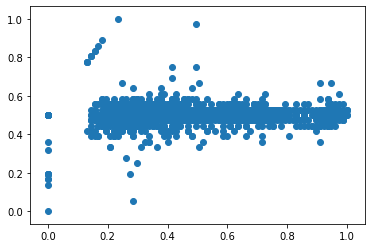

In [413]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

### 初步尝试 KMeans

尝试 2 堆聚类

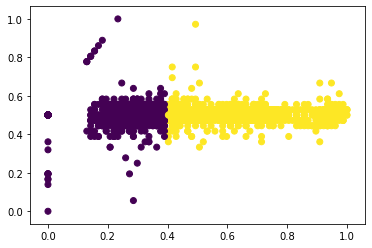

In [414]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [415]:
from sklearn import metrics
print(metrics.calinski_harabaz_score(X, y_pred))

6019.884015952393


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


尝试多堆聚类

In [416]:
n_clusters = 6

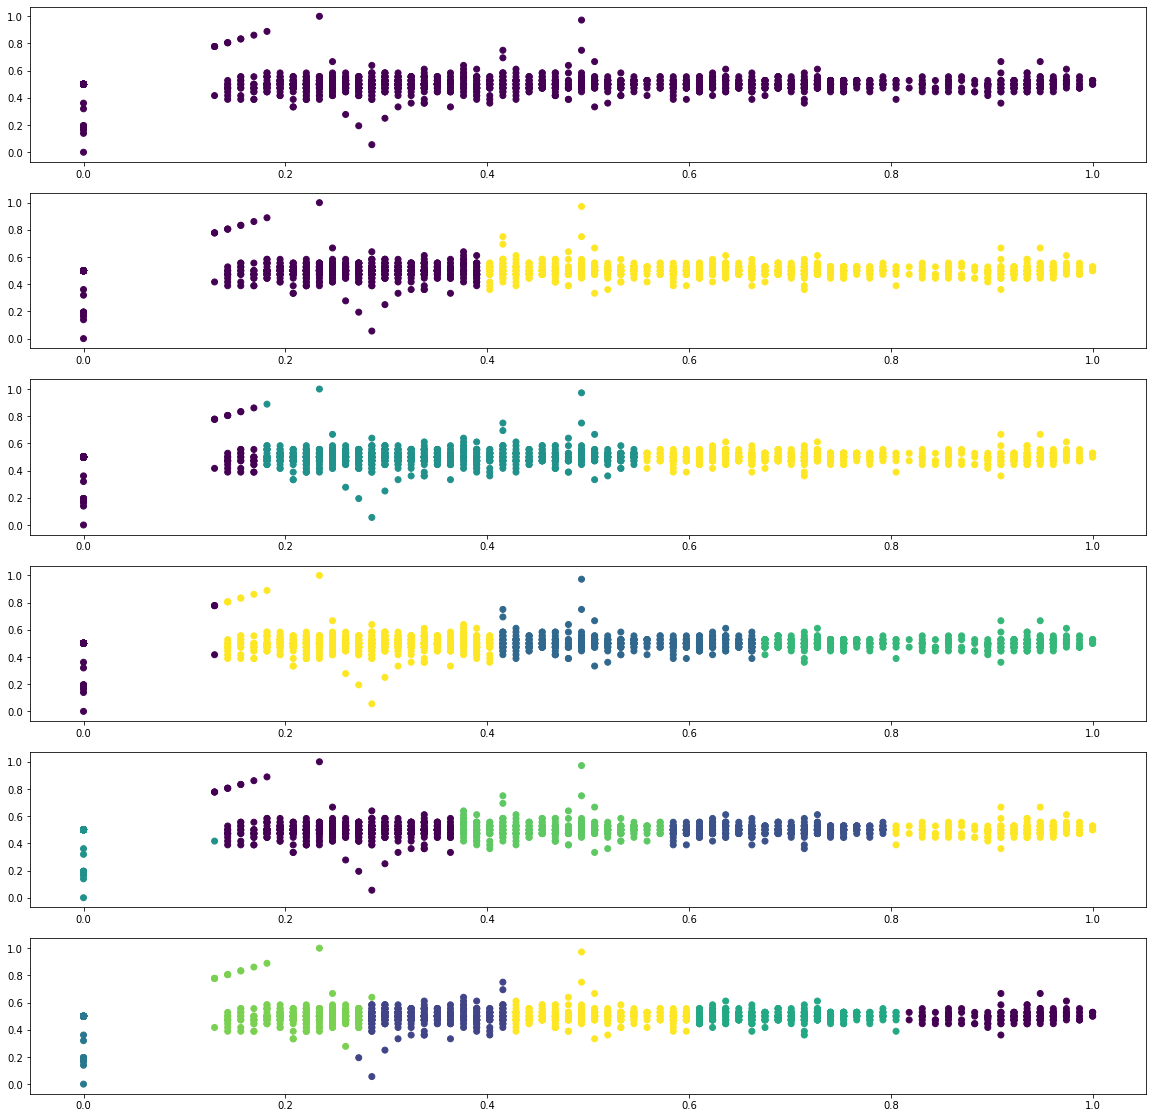

In [417]:
plt.figure(figsize=(20, 20))
for i in range(1, n_clusters + 1):
    plt.subplot(n_clusters, 1, i)
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

发现都是纵向切割的，根据速度切割，而不是根据加速度切割。但现在加速和减速其实是应该明显要区别出来的，所以再引入一维数据。

### 筛选数据

这里我们把速度和加速度为 0 的数据筛掉再试试。

In [418]:
segdf_filtered = segdf[(segdf.speed > 0) & (segdf.acc != 0)]

In [419]:
segdf_filtered

vehicleplatenumber  device_num  direction_angle         lng        lat  \
28113            AA00001  AAA9102001              199  115.860926  28.816196   
28114            AA00001  AAA9102001              203  115.860911  28.816158   
28115            AA00001  AAA9102001              203  115.860900  28.816123   
28116            AA00001  AAA9102001              204  115.860881  28.816083   
28117            AA00001  AAA9102001              203  115.860860  28.816036   
28118            AA00001  AAA9102001              202  115.860835  28.815981   
28119            AA00001  AAA9102001              203  115.860803  28.815920   
28120            AA00001  AAA9102001              203  115.860770  28.815848   
28121            AA00001  AAA9102001              202  115.860733  28.815773   
28123            AA00001  AAA9102001              200  115.860665  28.815621   
28124            AA00001  AAA9102001              200  115.860625  28.815543   
28126            AA00001  AAA9102001              200  115.860551  28.815381   
28127            AA00001  AAA9102001              197  115.860520  28.815300   
28128            AA00001  AAA9102001              194  115.860493  28.815216   
28130            AA00001  AAA9102001              199  115.860436  28.815050   
28131            AA00001  AAA9102001              201  115.860401  28.814966   
28132            AA00001  AAA9102001              202  115.860360  28.814878   
28133            AA00001  AAA9102001              202  115.860320  28.814791   
28135            AA00001  AAA9102001              201  115.860233  28.814608   
28136            AA00001  AAA9102001              201  115.860193  28.814513   
28138            AA00001  AAA9102001              204  115.860105  28.814325   
28140            AA00001  AAA9102001              200  115.860013  28.814138   
28142            AA00001  AAA9102001              199  115.859926  28.813945   
28144            AA00001  AAA9102001              200  115.859843  28.813750   
28146            AA00001  AAA9102001              200  115.859768  28.813555   
28148            AA00001  AAA9102001              200  115.859686  28.813351   
28149            AA00001  AAA9102001              200  115.859643  28.813243   
28150            AA00001  AAA9102001              201  115.859593  28.813131   
28151            AA00001  AAA9102001              202  115.859541  28.813021   
28153            AA00001  AAA9102001              204  115.859426  28.812781   
...                  ...         ...              ...         ...        ...   
29791            AA00001  AAA9102001              300  115.823830  28.704260   
29793            AA00001  AAA9102001              302  115.823775  28.704291   
29795            AA00001  AAA9102001              302  115.823718  28.704326   
29797            AA00001  AAA9102001              303  115.823663  28.704360   
29799            AA00001  AAA9102001              303  115.823611  28.704391   
29803            AA00001  AAA9102001              302  115.823505  28.704453   
29805            AA00001  AAA9102001              302  115.823455  28.704481   
29807            AA00001  AAA9102001              303  115.823411  28.704506   
29809            AA00001  AAA9102001              303  115.823371  28.704531   
29811            AA00001  AAA9102001              300  115.823335  28.704551   
29813            AA00001  AAA9102001              299  115.823301  28.704568   
29853            AA00001  AAA9102001              310  115.823091  28.704648   
29855            AA00001  AAA9102001              317  115.823066  28.704673   
29857            AA00001  AAA9102001              316  115.823036  28.704701   
29859            AA00001  AAA9102001              314  115.823000  28.704733   
29863            AA00001  AAA9102001              313  115.822930  28.704791   
29865            AA00001  AAA9102001              312  115.822893  28.704820   
29867            AA00001  AAA9102001              310  115.822848  28.704853   
29869 

看看可视化效果

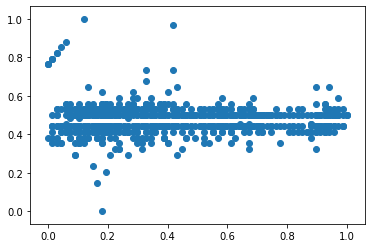

In [430]:
X = segdf_filtered[['gps_speed', 'acc']].values
X = MinMaxScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

尝试聚类

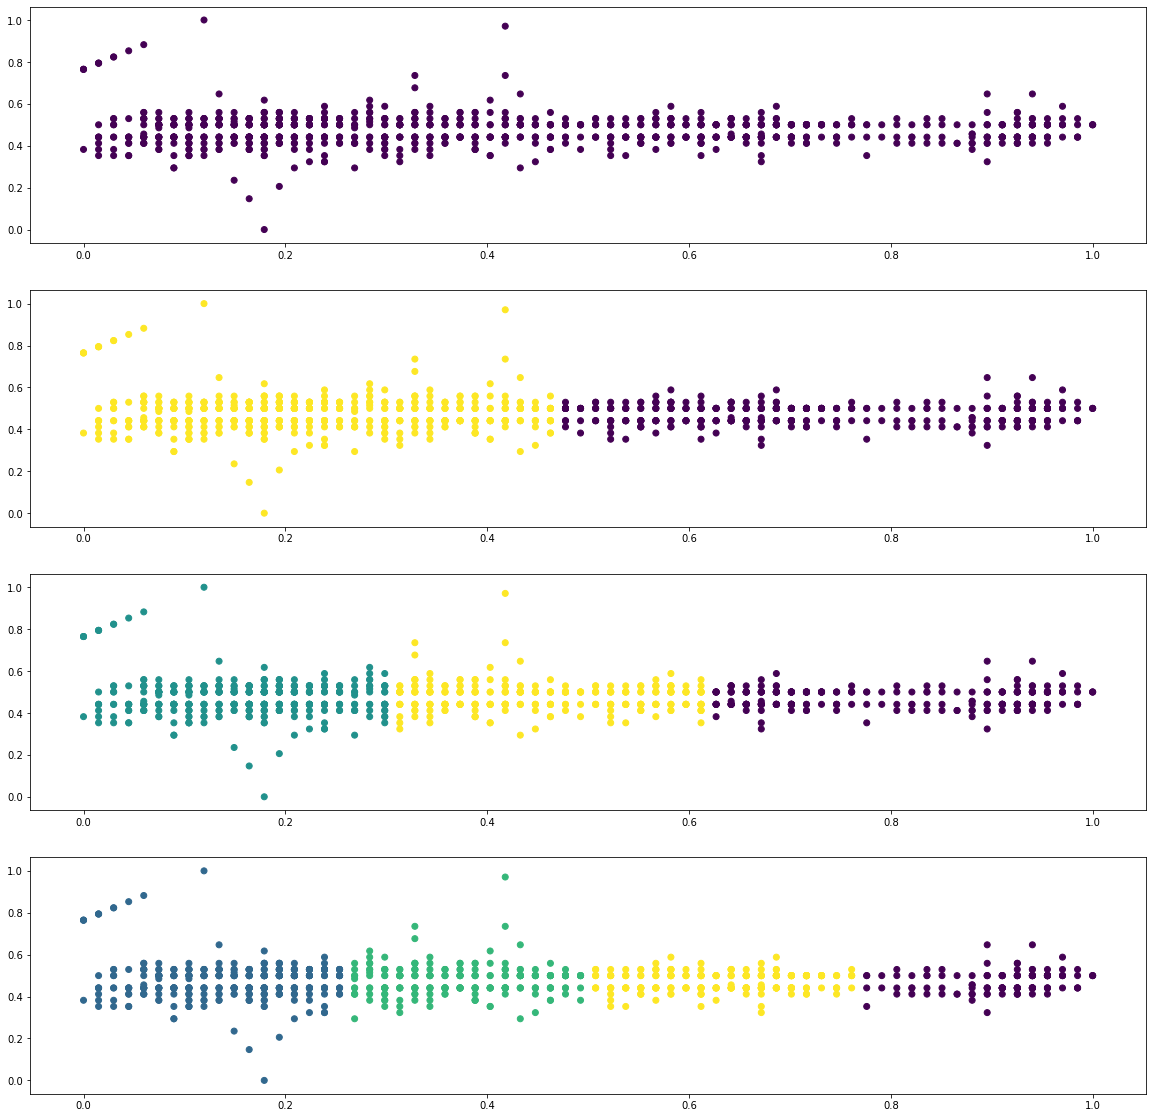

In [431]:
n_clusters = 4
plt.figure(figsize=(20, 20))
for i in range(1, n_clusters + 1):
    plt.subplot(n_clusters, 1, i)
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

依然还是没法把加速减速分开

### 加速减速速度处理

没法分开怎么办呢？单独加一维来辅助吧，定义一维加速状态，比如加速就是 1，减速就是 -1，停止就是 0

In [439]:
# 定义加速、减速、停止的状态
def speed_state(acc):
    if acc > 0: return 1
    if acc == 0: return 0
    if acc < 0: return -1

In [454]:
segdf['speed_state'] = segdf['acc'].apply(speed_state)

In [461]:
X = segdf[['speed', 'acc', 'speed_state']].values
X = MinMaxScaler().fit_transform(X)

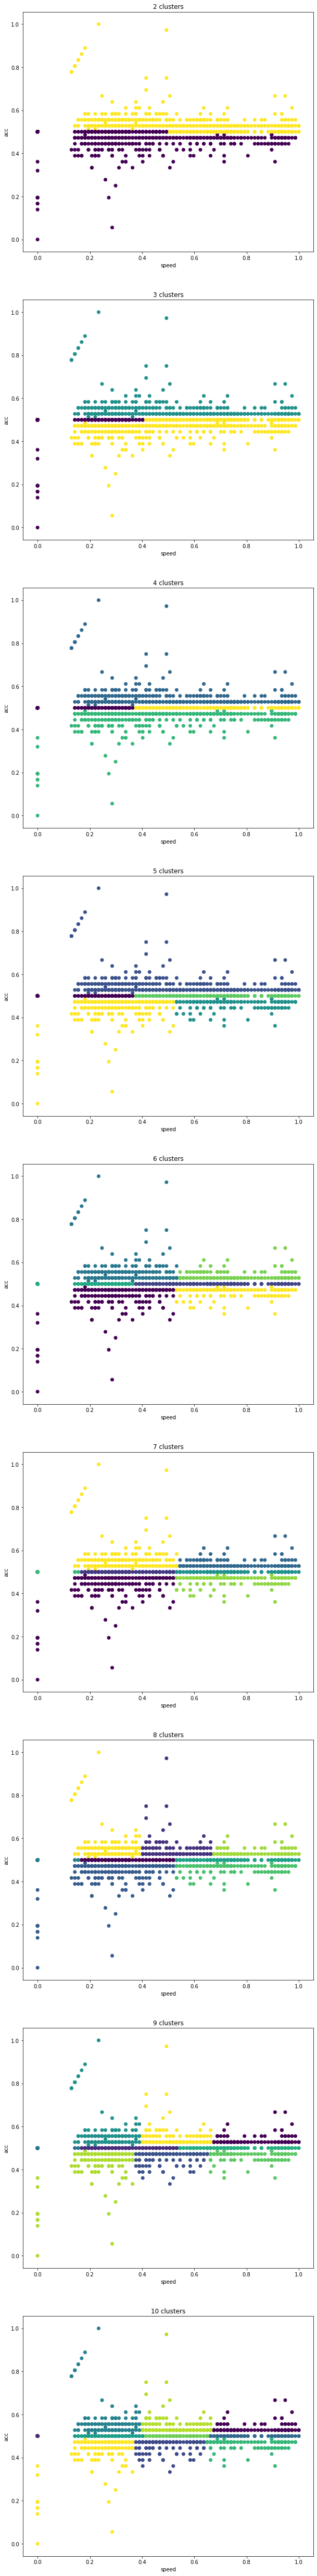

In [462]:
# 聚类 2 堆 - 8 堆
n_clusters = 10
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
for i in range(2, n_clusters + 1):
    ax = plt.subplot(n_clusters, 1, i)
    ax.set_title(f'{i} clusters')
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.ylabel('acc')
    plt.xlabel('speed')
plt.show()

卧槽聚出来了！

速度和加速度不是 0 的还在里面，那咱们直接去掉吧，估计效果会更好。

In [464]:
segdf_filtered['speed_state'] = segdf_filtered['acc'].apply(speed_state)
X = segdf_filtered[['speed', 'acc', 'speed_state']].values
X = MinMaxScaler().fit_transform(X)

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


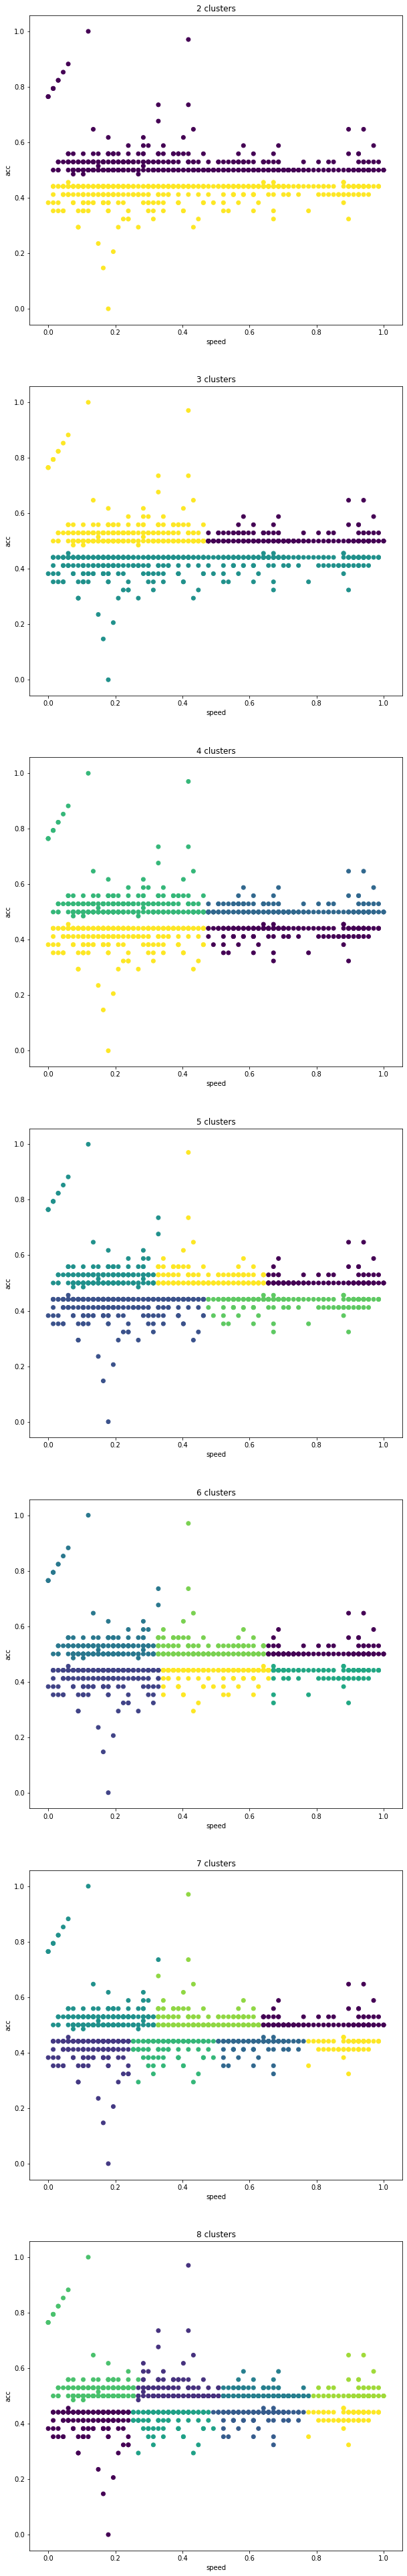

In [465]:
# 聚类 2 堆 - 8 堆
n_clusters = 8
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
for i in range(2, n_clusters + 1):
    ax = plt.subplot(n_clusters, 1, i)
    ax.set_title(f'{i} clusters')
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.ylabel('acc')
    plt.xlabel('speed')
plt.show()

看 4 堆的数据，我们聚出来了速度高的加速和减速，速度低的加速和减速。

下面我们再尝试其他的聚类方法。

### DBScan

基于密度聚类，无法指定堆的数目

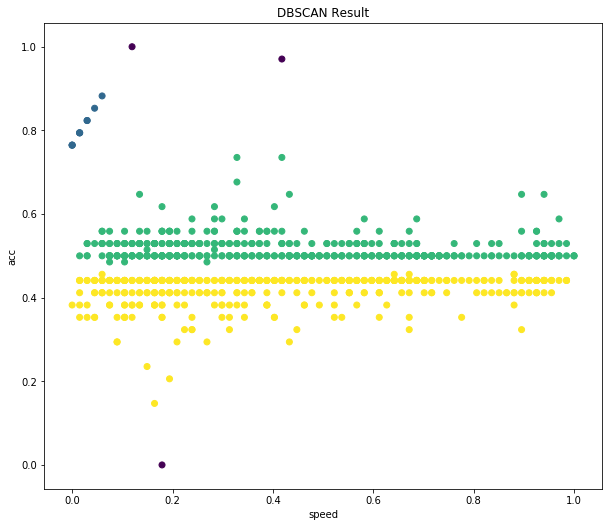

In [478]:
from sklearn.cluster import DBSCAN
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('DBSCAN Result')
y_pred = DBSCAN(eps=0.1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

In [480]:
# 堆数
print(np.unique(y_pred))

[-1  0  1  2]


这里可以看到聚类分成了 4 类。

观察下可以看到有：
* 所有速度的普通加速
* 所有速度的普通减速
* 急加速
* 急减速

还是很不错的！普通加减速和急速加减速分出来了！

可能数据量不够大，因为我们只拿了一个分段来处理。我们把前面所有的分段拿来看看。

这里先保存下历史数据。

In [485]:
segdf10 = segdf
segdf_filtered10 = segdf_filtered

In [499]:
# 把之前所有的分段都拿来，还是之前一样的预处理方式处理下
segdfs = rawdf_subs
xs = []
for segdf in segdfs:
    segdf_shift = segdf.shift(1)
    # 算速度差值
    segdf_speed_minus = segdf['gps_speed'] - segdf_shift['gps_speed']
    # 算加速度
    segdf['acc'] = segdf_speed_minus / segdf['timestamp_minus']
    segdf['acc'] = segdf['acc'].fillna(0)
    # 速度取别名
    segdf['speed'] = segdf['gps_speed']
    # 过滤 0 速度
    segdf_filtered = segdf[(segdf.speed > 0) & (segdf.acc != 0)]
    # 增加速度状态
    segdf_filtered['speed_state'] = segdf_filtered['acc'].apply(speed_state)
    # 数据
    x = segdf_filtered[['speed', 'acc', 'speed_state']].values
    if not len(x): continue
    x = MinMaxScaler().fit_transform(x)
    x = np.array(x)
    xs.append(x)

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [565]:
X = np.concatenate(tuple(xs), axis=0)

In [566]:
X.shape

(57693, 3)

现在有五万多数据了，来聚类试试

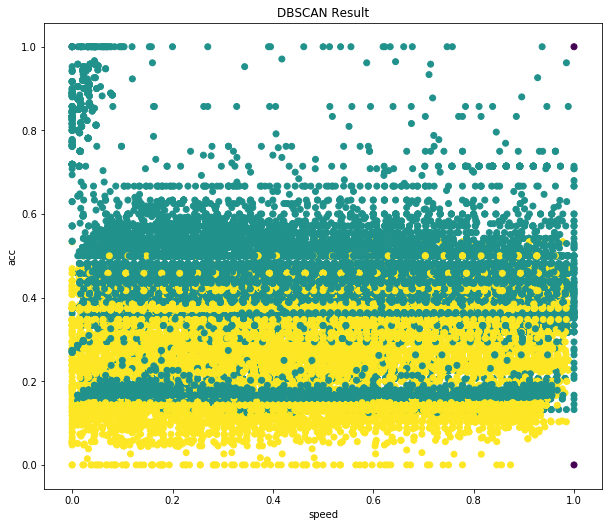

In [504]:
from sklearn.cluster import DBSCAN
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('DBSCAN Result')
y_pred = DBSCAN(eps=0.1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

不太行，数据量看来还是不能太大啊，这全都占满了，密度太大了啊。

Kmeans 试试呢再。

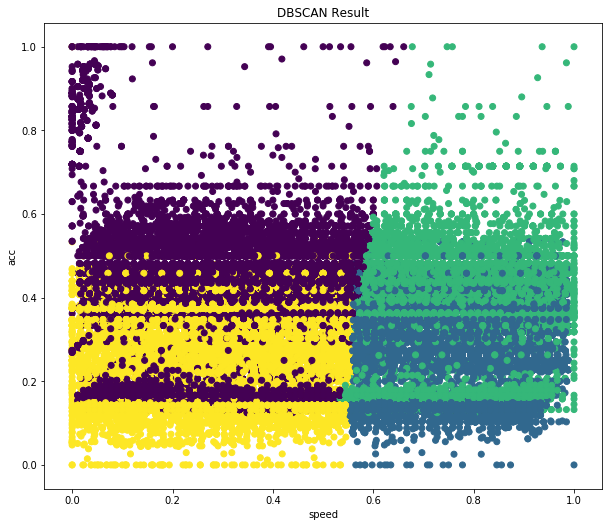

In [508]:
from sklearn.cluster import KMeans
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('DBSCAN Result')
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

这个还不错，能分出：

* 高速加速
* 高速减速
* 低速加速
* 低速减速

再适当控制下数量看看 DBSCAN，觉得这个在数据量适当的情况下应该还不错

In [511]:
from random import sample

In [514]:
x.shape

(6040, 3)

In [535]:
X = sample(x.tolist(), 5000)

In [536]:
X = np.asarray(X)

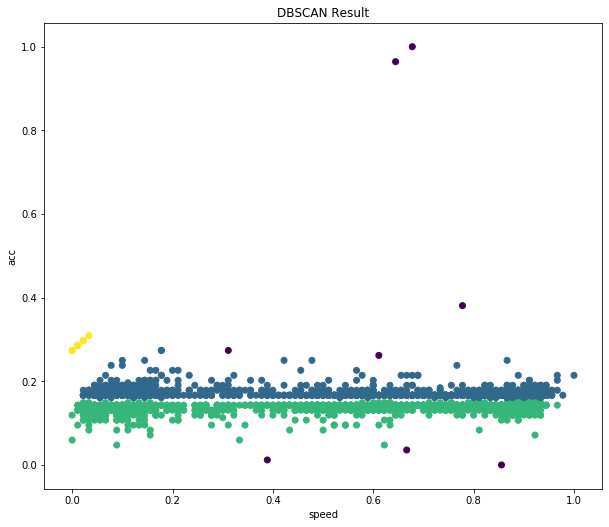

In [547]:
from sklearn.cluster import DBSCAN
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('DBSCAN Result')
y_pred = DBSCAN(eps=0.05).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

不错，再次分出来了。

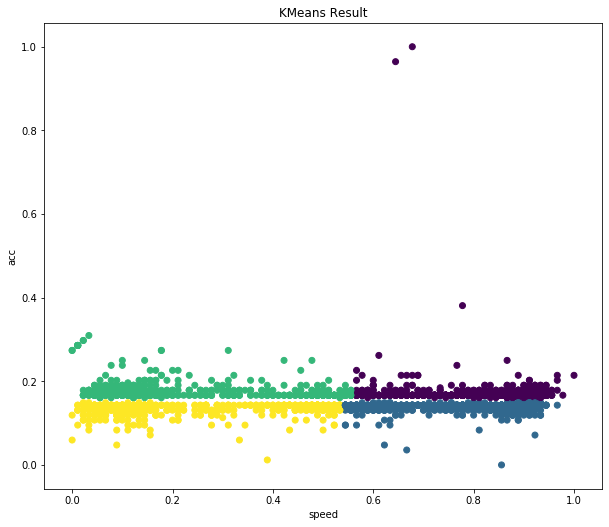

In [545]:
from sklearn.cluster import KMeans
figsize_x = 10
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('KMeans Result')
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

恩，也基本能分出来的。

再试试别的聚类。

### 谱聚类

原理可以搜下

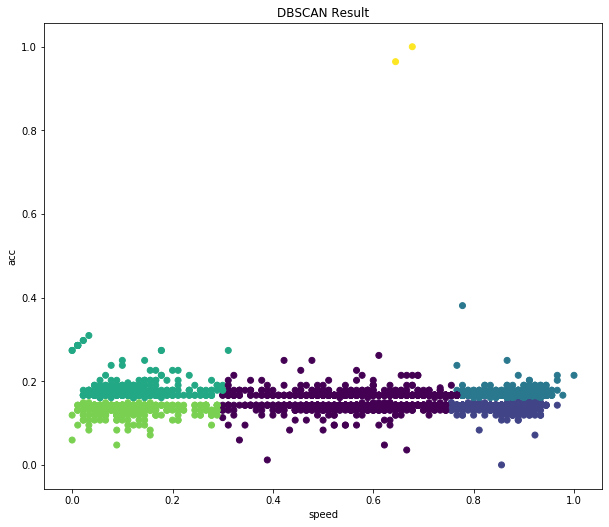

In [551]:
from sklearn.cluster import SpectralClustering
figsize_x = 10
n_clusters = 6
plt.figure(figsize=(10, figsize_x * n_clusters))
ax = plt.subplot(n_clusters, 1, i)
ax.set_title('DBSCAN Result')
y_pred = SpectralClustering(n_clusters=n_clusters, gamma=0.4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

### 层次聚类

即结合了距离和密度的聚类。

In [570]:
X = sample(x.tolist(), 5000)
X = np.asarray(X)

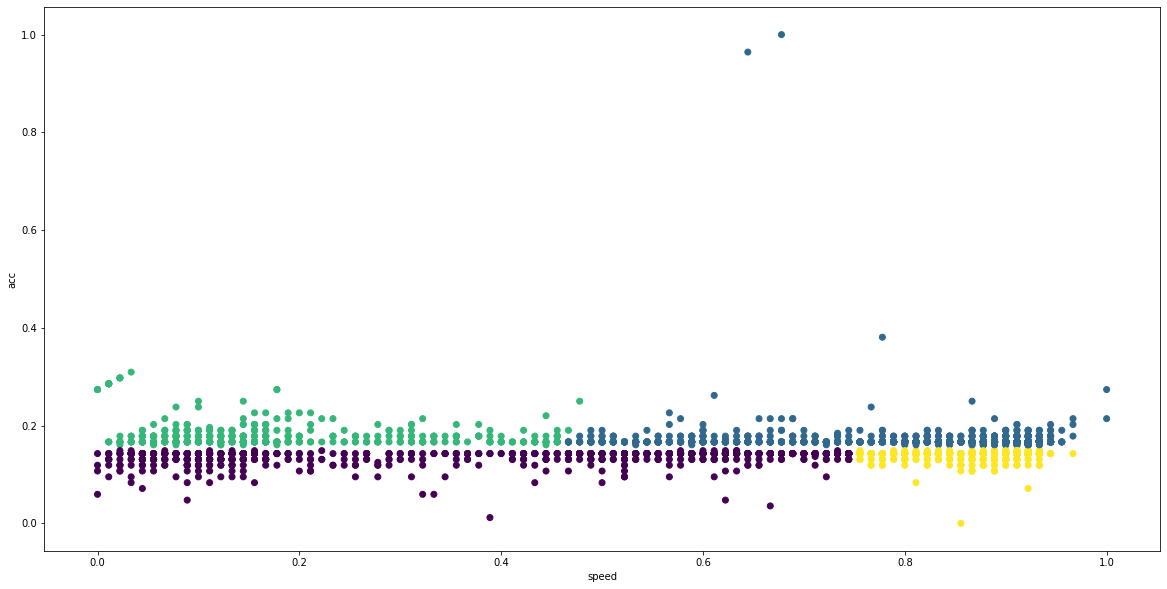

In [571]:
from sklearn.cluster import AgglomerativeClustering
figsize_x = 10
n_clusters = 4
y_pred = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

### 混合高斯模型

In [583]:
X = np.concatenate(tuple(xs), axis=0)
X.shape

(57693, 3)

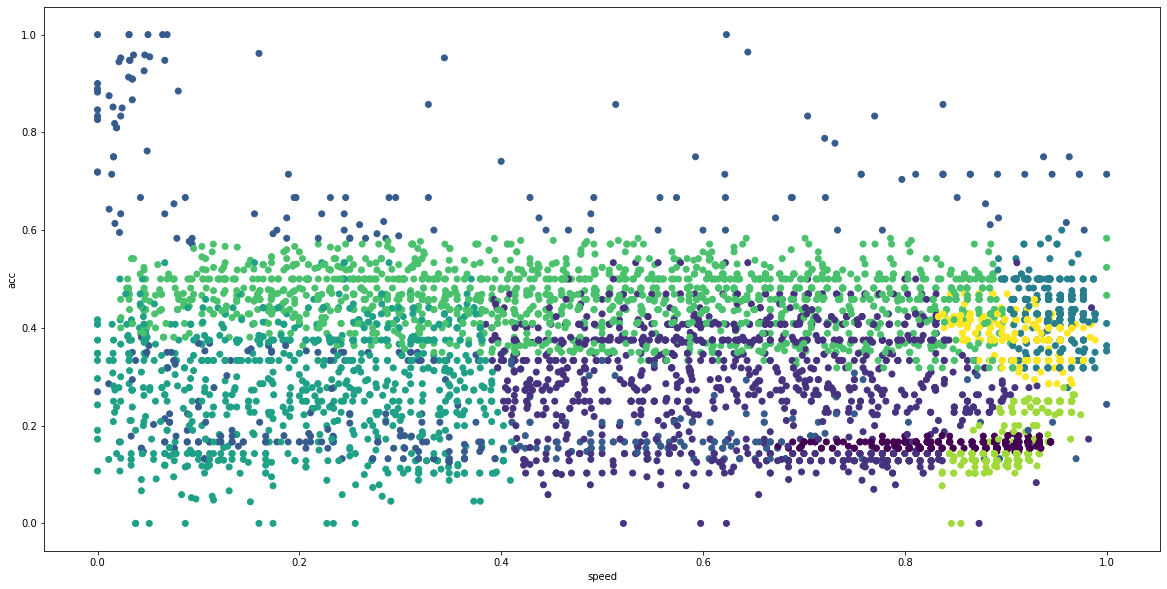

In [596]:
X = sample(X.tolist(), 6000)
X = np.asarray(X)

from sklearn.mixture import GaussianMixture
figsize_x = 10
n_clusters = 8
y_pred = GaussianMixture(n_components=n_clusters).fit_predict(X)
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylabel('acc')
plt.xlabel('speed')
plt.show()

可以看到！混合高斯模型能进一步分出来加速度！

目前观测可以分为如下结果：

* 高速急减速
* 高速缓减速
* 高速缓加速
* 高速急加速

还有对应的低速、中速等

* 中速急减速
* 中速缓减速
* 中速缓加速
* 中速急加速

这个再仔细观察下吧

遍历下 cluster 的个数，打印出来

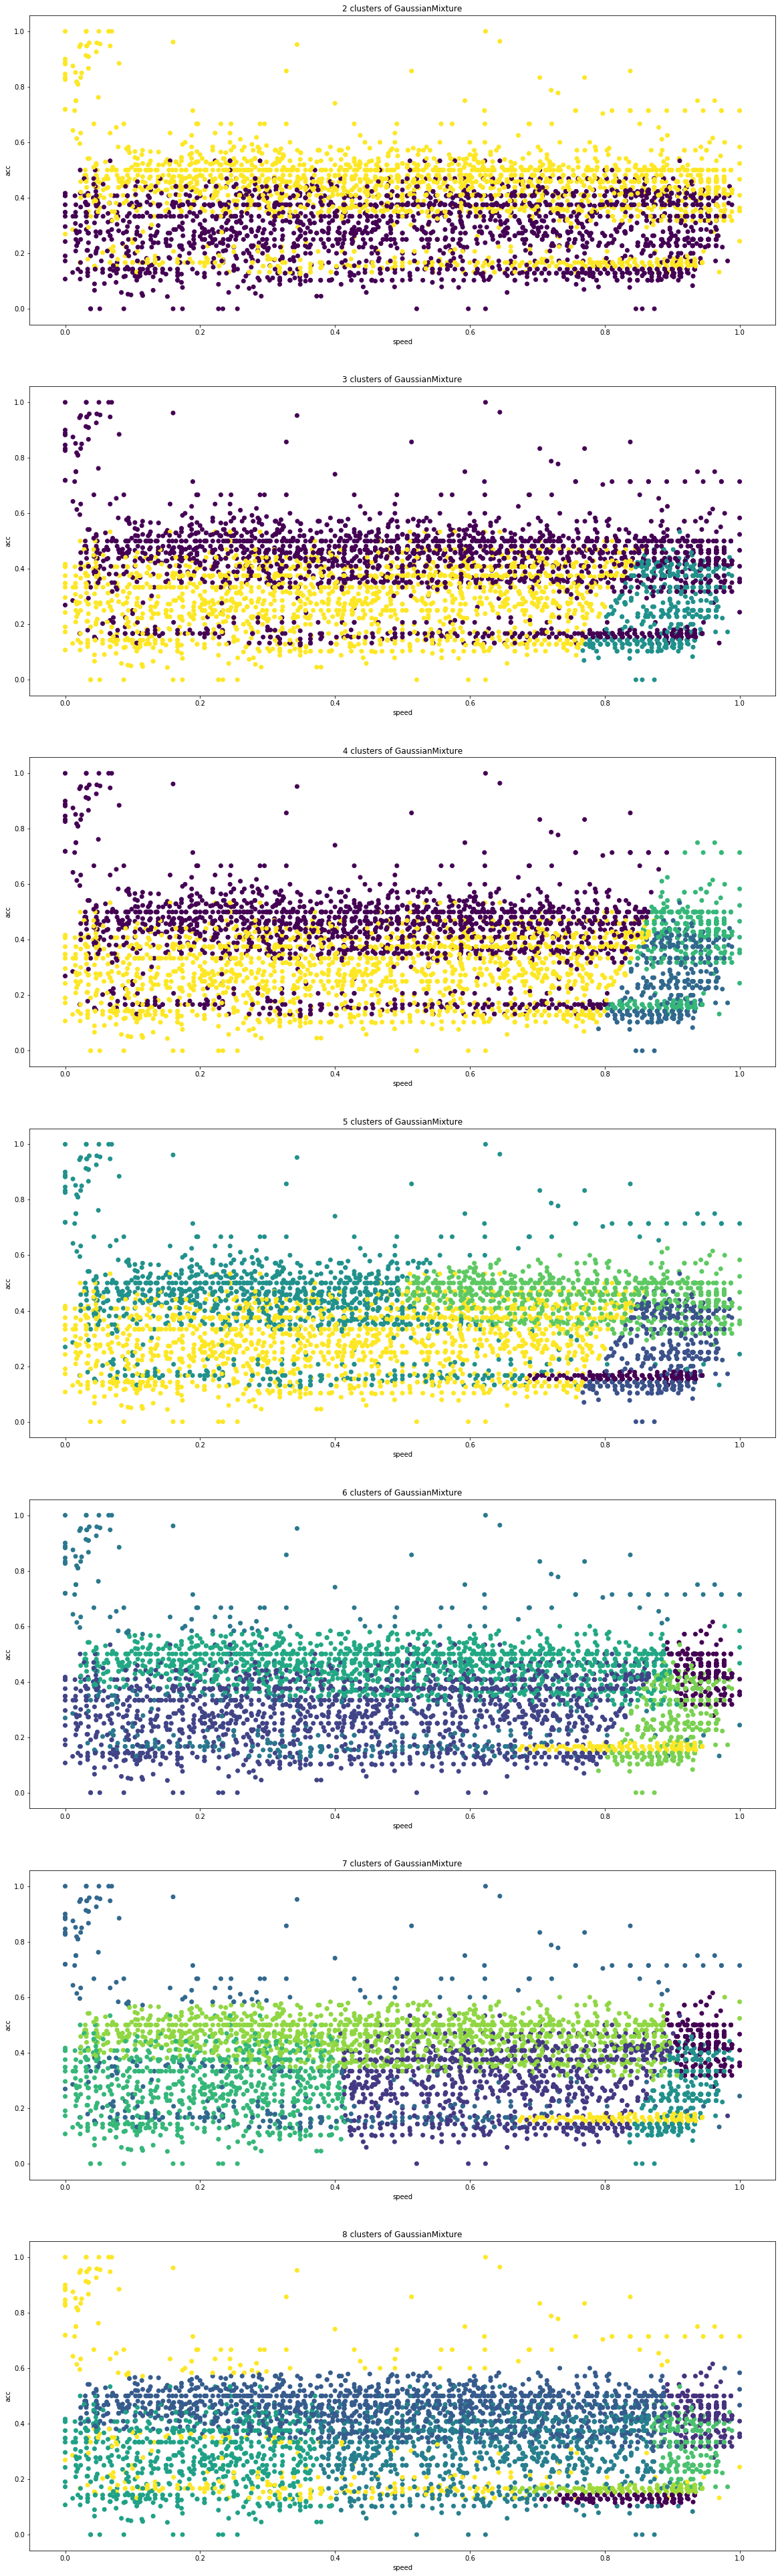

In [599]:
# 聚类 2 堆 - 8 堆
n_clusters = 8
figsize_x = 10
plt.figure(figsize=(20, figsize_x * n_clusters))
for i in range(2, n_clusters + 1):
    ax = plt.subplot(n_clusters, 1, i)
    ax.set_title(f'{i} clusters of GaussianMixture')
    y_pred = GaussianMixture(n_components=i).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.ylabel('acc')
    plt.xlabel('speed')
plt.show()

可以看到混合高斯模型效果还是不错的。

可以详细观测下看看，然后分一下。

下一步就是根据聚类的结果，大体划分下数据集，来做个分类器了。

Fighting！